In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from matplotlib import rcParams
rcParams['figure.figsize']=10,6
from keras.layers.core import Dense, Activation, Dropout
from tensorflow.keras.layers import LSTM
from keras.models import Sequential
import time
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import os
#print(os.listdir("../input"))



In [5]:
from google.colab import files
upload = files.upload()

Saving rainfall in india 1901-2015.csv to rainfall in india 1901-2015.csv


In [6]:
dataset=pd.read_csv("rainfall in india 1901-2015.csv")
dataset.dtypes

SUBDIVISION     object
YEAR             int64
JAN            float64
FEB            float64
MAR            float64
APR            float64
MAY            float64
JUN            float64
JUL            float64
AUG            float64
SEP            float64
OCT            float64
NOV            float64
DEC            float64
ANNUAL         float64
Jan-Feb        float64
Mar-May        float64
Jun-Sep        float64
Oct-Dec        float64
dtype: object

In [7]:
groups = dataset.groupby('SUBDIVISION')['YEAR','JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','NOV','DEC']
data=groups.get_group(('BIHAR'))
data.head()

<ipython-input-7-f0dc61568ebf>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  groups = dataset.groupby('SUBDIVISION')['YEAR','JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','NOV','DEC']


,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,NOV,DEC
897,1901,51.8,19.6,11.9,1.1,65.6,66.3,245.9,319.4,155.1,7.3,0.1
898,1902,4.6,0.7,24.3,17.3,66.3,118.2,361.0,225.5,358.7,1.1,0.0
899,1903,5.3,4.7,2.0,4.7,28.2,192.9,115.0,342.6,173.9,0.1,0.0
900,1904,6.3,1.7,3.5,5.3,118.7,191.6,394.4,351.3,84.4,10.6,3.8
901,1905,16.0,30.1,32.6,21.4,77.5,50.5,409.1,495.3,353.9,0.0,0.6


In [8]:
data=data.melt(['YEAR']).reset_index()
data.head()


,index,YEAR,variable,value
0,0,1901,JAN,51.8
1,1,1902,JAN,4.6
2,2,1903,JAN,5.3
3,3,1904,JAN,6.3
4,4,1905,JAN,16.0


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [9]:
df= data[['YEAR','variable','value']].reset_index().sort_values(by=['YEAR','index'])
df.head()

,index,YEAR,variable,value
0,0,1901,JAN,51.8
115,115,1901,FEB,19.6
230,230,1901,MAR,11.9
345,345,1901,APR,1.1
460,460,1901,MAY,65.6


In [10]:
df.columns=['INDEX','YEAR','Month','avg_rainfall']

In [11]:
df.head()

,INDEX,YEAR,Month,avg_rainfall
0,0,1901,JAN,51.8
115,115,1901,FEB,19.6
230,230,1901,MAR,11.9
345,345,1901,APR,1.1
460,460,1901,MAY,65.6


In [12]:
d={'JAN':1,'FEB':2,'MAR' :3,'APR':4,'MAY':5,'JUN':6,'JUL':7,'AUG':8,'SEP':9,
   'OCT':10,'NOV':11,'DEC':12}
df['Month']=df['Month'].map(d)
df.head(12)

,INDEX,YEAR,Month,avg_rainfall
0,0,1901,1,51.8
115,115,1901,2,19.6
230,230,1901,3,11.9
345,345,1901,4,1.1
460,460,1901,5,65.6
575,575,1901,6,66.3
690,690,1901,7,245.9
805,805,1901,8,319.4
920,920,1901,9,155.1
1035,1035,1901,11,7.3


In [13]:
df['Date']=pd.to_datetime(df.assign(Day=1).loc[:,['YEAR','Month','Day']])
df.head(12)

,INDEX,YEAR,Month,avg_rainfall,Date
0,0,1901,1,51.8,1901-01-01
115,115,1901,2,19.6,1901-02-01
230,230,1901,3,11.9,1901-03-01
345,345,1901,4,1.1,1901-04-01
460,460,1901,5,65.6,1901-05-01
575,575,1901,6,66.3,1901-06-01
690,690,1901,7,245.9,1901-07-01
805,805,1901,8,319.4,1901-08-01
920,920,1901,9,155.1,1901-09-01
1035,1035,1901,11,7.3,1901-11-01


In [14]:
cols=['avg_rainfall']
dataset=df[cols]
dataset.head()

,avg_rainfall
0,51.8
115,19.6
230,11.9
345,1.1
460,65.6


In [15]:
series=dataset
series.head()

,avg_rainfall
0,51.8
115,19.6
230,11.9
345,1.1
460,65.6


In [16]:
series.shape

(1265, 1)

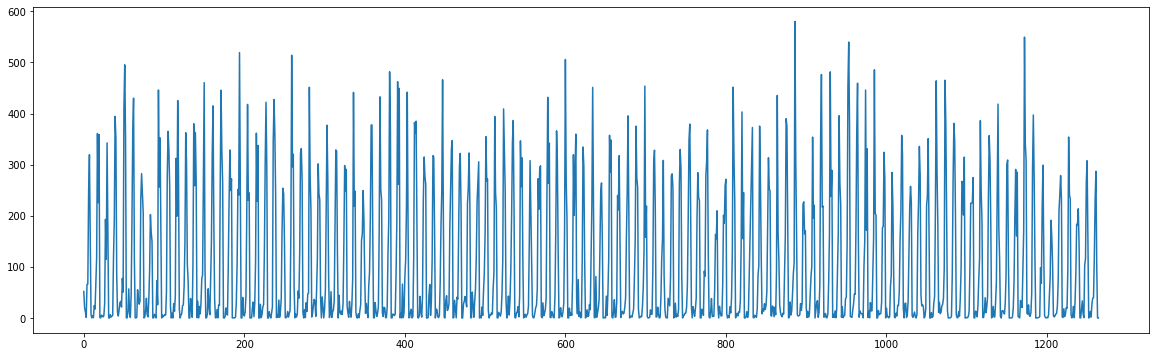

In [17]:
pyplot.figure(figsize=(20,6))
pyplot.plot(series.values)
pyplot.show()

In [19]:
data_raw = series.values.astype("float32")

scaler = MinMaxScaler(feature_range = (0, 1))
dataset = scaler.fit_transform(data_raw)

dataset[0:5]

array([[0.08929496],
       [0.03378728],
       [0.02051371],
       [0.00189622],
       [0.11308396]], dtype=float32)

In [20]:
TRAIN_SIZE = 0.80

train_size = int(len(dataset) * TRAIN_SIZE)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]
print("Number of entries (training set, test set): " + str((len(train), len(test))))

Number of entries (training set, test set): (1012, 253)


In [21]:
def create_dataset(dataset, window_size = 1):
    data_X, data_Y = [], []
    for i in range(len(dataset) - window_size - 1):
        a = dataset[i:(i + window_size), 0]
        data_X.append(a)
        data_Y.append(dataset[i + window_size, 0])
    return(np.array(data_X), np.array(data_Y))

In [22]:
window_size = 1
train_X, train_Y = create_dataset(train, window_size)
test_X, test_Y = create_dataset(test, window_size)
print("Original training data shape:")
print(train_X.shape)

train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))
print("New training data shape:")
print(train_X.shape)

Original training data shape:
(1010, 1)
New training data shape:
(1010, 1, 1)


In [24]:
def fit_model(train_X, train_Y, window_size = 1):
    model = Sequential()
    
    model.add(LSTM(2000,activation = 'tanh', input_shape = (1, window_size)))
    model.add(Dropout(0.2))
    model.add(Dense(500))
    model.add(Dropout(0.4))
    model.add(Dense(500))
    model.add(Dropout(0.4))
    model.add(Dense(400))
    model.add(Dropout(0.4))
    model.add(Dense(1, activation = 'linear'))
    model.compile(loss = "mean_squared_error", 
                  optimizer = "adam")
    model.fit(train_X, 
              train_Y, 
              epochs = 10, 
              batch_size = 64, 
              )
    
    return(model)

# Fit the first model.
model1 = fit_model(train_X, train_Y, window_size)

Epoch 1/10
16/16 [==============================] - 13s 572ms/step - loss: 0.0441
Epoch 2/10
16/16 [==============================] - 13s 838ms/step - loss: 0.0368
Epoch 3/10
16/16 [==============================] - 15s 868ms/step - loss: 0.0360
Epoch 4/10
16/16 [==============================] - 9s 554ms/step - loss: 0.0374
Epoch 5/10
16/16 [==============================] - 12s 751ms/step - loss: 0.0385
Epoch 6/10
16/16 [==============================] - 11s 701ms/step - loss: 0.0395
Epoch 7/10
16/16 [==============================] - 10s 621ms/step - loss: 0.0364
Epoch 8/10
16/16 [==============================] - 9s 586ms/step - loss: 0.0368
Epoch 9/10
16/16 [==============================] - 10s 585ms/step - loss: 0.0370
Epoch 10/10
16/16 [==============================] - 10s 626ms/step - loss: 0.0368


In [25]:
import math
def predict_and_score(model, X, Y):
    pred = scaler.inverse_transform(model.predict(X))

    orig_data = scaler.inverse_transform([Y])
   
    score = math.sqrt(mean_squared_error(orig_data[0], pred[:, 0]))
    return(score, pred)

rmse_train, train_predict = predict_and_score(model1, train_X, train_Y)
rmse_test, test_predict = predict_and_score(model1, test_X, test_Y)

print("Training data score: %.2f RMSE" % rmse_train)
print("Test data score: %.2f RMSE" % rmse_test)

8/8 [==============================] - 1s 78ms/step
Training data score: 114.62 RMSE
Test data score: 101.45 RMSE


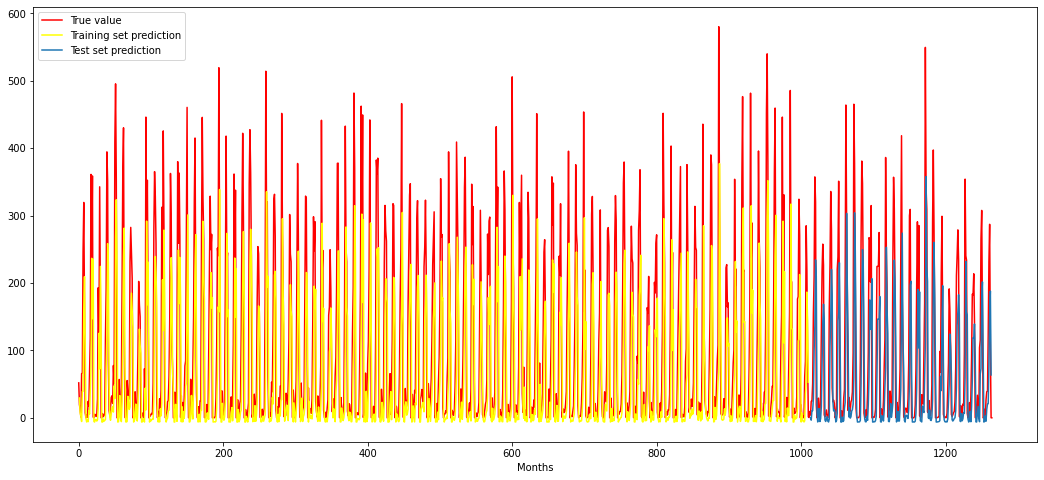

In [27]:
train_predict_plot = np.empty_like(dataset)
train_predict_plot[:, :] = np.nan
train_predict_plot[window_size:len(train_predict) + window_size, :] = train_predict

test_predict_plot = np.empty_like(dataset)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (window_size * 2) + 1:len(dataset) - 1, :] = test_predict

plt.figure(figsize = (18, 8))
plt.plot(scaler.inverse_transform(dataset), label = "True value",color='red')
plt.plot(train_predict_plot, label = "Training set prediction",color='yellow')
plt.plot(test_predict_plot, label = "Test set prediction")
plt.xlabel("Months")

plt.legend()
plt.show()

In [28]:
test_predict

array([[ 2.19977200e-01],
       [-3.51554108e+00],
       [ 1.06485720e+01],
       [ 1.06485720e+01],
       [ 2.89585972e+01],
       [ 9.96005096e+01],
       [ 1.36122284e+02],
       [ 2.34171600e+02],
       [ 2.09717728e+02],
       [ 7.06008244e+00],
       [-6.21539450e+00],
       [ 1.32690392e+01],
       [ 1.38205109e+01],
       [-5.59220695e+00],
       [-1.43986094e+00],
       [ 1.63012905e+01],
       [ 8.34237061e+01],
       [ 1.41877136e+02],
       [ 1.68471924e+02],
       [ 1.47757492e+02],
       [-3.23871779e+00],
       [-5.45372486e+00],
       [-1.57820964e+00],
       [ 1.74093175e+00],
       [-4.89986563e+00],
       [-6.21539450e+00],
       [-1.64738357e+00],
       [ 1.05068886e+02],
       [ 1.48425201e+02],
       [ 2.20028961e+02],
       [ 1.82730850e+02],
       [ 2.43539829e+01],
       [ 1.01656675e+01],
       [ 1.16831551e+01],
       [ 8.71668053e+00],
       [-6.14614630e+00],
       [-4.20764589e+00],
       [ 6.30061007e+00],
       [ 1.4

In [29]:
train_predict

array([[ 29.43939  ],
       [  7.2672005],
       [  1.9482923],
       ...,
       [186.50267  ],
       [142.88007  ],
       [ 52.79597  ]], dtype=float32)